In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
train_images,test_images = train_images/255.0,test_images/255.0



170500096/170498071 [==============================] - 19s 0us/step


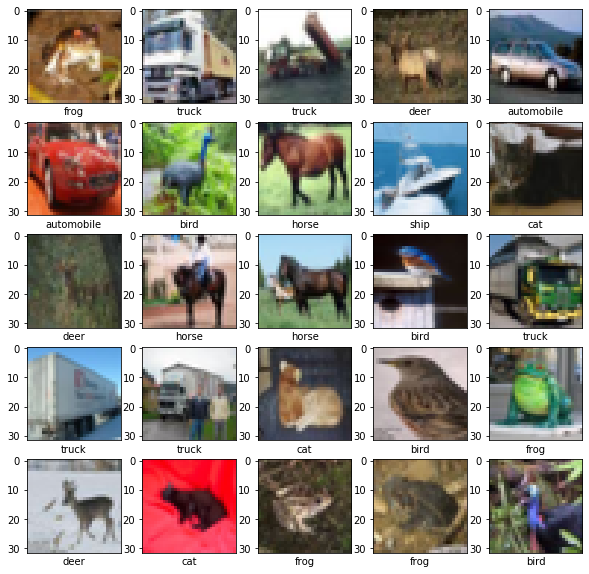

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))



for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3) ,activation='relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.5035 - accuracy: 0.4543 - val_loss: 1.2374 - val_accuracy: 0.5553
Epoch 2/10
50000/50000 [==============================] - 50s 1000us/sample - loss: 1.1366 - accuracy: 0.5985 - val_loss: 1.0872 - val_accuracy: 0.6089
Epoch 3/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.9829 - accuracy: 0.6560 - val_loss: 0.9589 - val_accuracy: 0.6626
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8855 - accuracy: 0.6899 - val_loss: 0.8996 - val_accuracy: 0.6923
Epoch 5/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.8108 - accuracy: 0.7164 - val_loss: 0.8901 - val_accuracy: 0.6914
Epoch 6/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.7544 - accuracy: 0.7362 - val_loss: 0.8682 - val_accuracy: 0.7005
Epoch 7/10
50000/50000 [=============================